In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import math
import datetime

In [2]:
df = pd.read_csv('data\covid-19-cases-by-notification-date-and-postcode-local-health-district-and-local-government-area.csv')

display(df.head(5))

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19
0,2020-01-22,2134.0,X700,Sydney,11300.0,Burwood (A)
1,2020-01-24,2121.0,X760,Northern Sydney,16260.0,Parramatta (C)
2,2020-01-25,2071.0,X760,Northern Sydney,14500.0,Ku-ring-gai (A)
3,2020-01-25,2033.0,X720,South Eastern Sydney,16550.0,Randwick (C)
4,2020-01-30,2350.0,X800,Hunter New England,10130.0,Armidale Regional (A)


In [3]:
df.notification_date = pd.to_datetime(df.notification_date)
df.postcode.dropna(inplace=True)

trunc = lambda x: math.trunc(1000 * x) / 1000;
df.postcode = df.postcode.apply(trunc)
df['cases'] = 1
display(df.head(5))
display(df.shape)

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,cases
0,2020-01-22,2134.0,X700,Sydney,11300.0,Burwood (A),1
1,2020-01-24,2121.0,X760,Northern Sydney,16260.0,Parramatta (C),1
2,2020-01-25,2071.0,X760,Northern Sydney,14500.0,Ku-ring-gai (A),1
3,2020-01-25,2033.0,X720,South Eastern Sydney,16550.0,Randwick (C),1
4,2020-01-30,2350.0,X800,Hunter New England,10130.0,Armidale Regional (A),1


(2926, 7)

In [8]:
# df.groupby(['postcode'])['cases'].sum()
df['cases_cumulative_postcode'] = df.groupby(['postcode'])['cases'].cumsum()
# df.index = df.notification_date
display(df)

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,cases,cases_cumulative_postcode
notification_date,,,,,,,,
2020-01-22,2020-01-22,2134.0,X700,Sydney,11300.0,Burwood (A),1,1
2020-01-24,2020-01-24,2121.0,X760,Northern Sydney,16260.0,Parramatta (C),1,1
2020-01-25,2020-01-25,2071.0,X760,Northern Sydney,14500.0,Ku-ring-gai (A),1,1
2020-01-25,2020-01-25,2033.0,X720,South Eastern Sydney,16550.0,Randwick (C),1,1
2020-01-30,2020-01-30,2350.0,X800,Hunter New England,10130.0,Armidale Regional (A),1,1
...,...,...,...,...,...,...,...,...
2020-04-15,2020-04-15,2088.0,X760,Northern Sydney,15350.0,Mosman (A),1,42
2020-04-16,2020-04-16,2430.0,X800,Hunter New England,15240.0,Mid-Coast (A),1,16
2020-04-16,2020-04-16,2560.0,X710,South Western Sydney,11500.0,Campbelltown (C) (NSW),1,17


In [5]:
# grouped_cumulative = df.groupby(['notification_date','postcode'])['notification_date'].count()
# grouped_cumulative
# pd.pivot_table(df,values='cases_cumulative_postcode',index=['notification_date','postcode'])

In [10]:
clean_week = df[df.notification_date>=(datetime.datetime.now()-datetime.timedelta(hours=150))].dropna(axis=1,how='all')
clean_week


,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,cases,cases_cumulative_postcode
notification_date,,,,,,,,
2020-04-16,2020-04-16,2430.0,X800,Hunter New England,15240.0,Mid-Coast (A),1,16
2020-04-16,2020-04-16,2560.0,X710,South Western Sydney,11500.0,Campbelltown (C) (NSW),1,17
2020-04-16,2020-04-16,NaN,NaN,NaN,NaN,NaN,1,-1
2020-04-16,2020-04-16,2138.0,X700,Sydney,11520.0,Canada Bay (A),1,4


<BarContainer object of 4 artists>

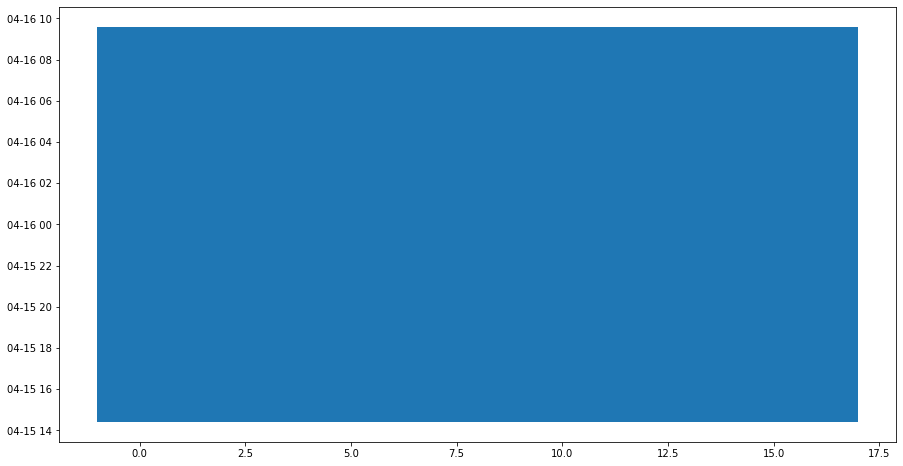

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(clean_week.index,clean_week.cases_cumulative_postcode)
# ax.barh(clean_week.index, clean_week.)